<a href="https://colab.research.google.com/github/santiagorc99/MyS-2020-2/blob/main/Modelado_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Chaos in a Single Op-Amp–Based Jerk Circuit: Experiments and Simulations](https://repositorio.unesp.br/bitstream/handle/11449/172852/2-s2.0-84963976895.pdf?sequence=1&isAllowed=y)  

# Resumen 
**En el siguiente trabajo se presenta un intento de replicar los resultados de simulaciones, gráficas de fase y diagrama de bifurcaciones, de un sistema caotico representado por un sistema de ecuaciones diferenciales de tercer de la forma de ecuacion *jerk* que se presentan el artículo [Chaos in a Single Op-Amp–Based Jerk Circuit: Experiments and Simulations](https://repositorio.unesp.br/bitstream/handle/11449/172852/2-s2.0-84963976895.pdf?sequence=1&isAllowed=y)**

# Introducción

En el artículo de referencia se plantea el uso de un circuito simple para hacer un oscilador caótico. El circuito está compuesto por solo un amplificador operacional, un transisto de efecto campo de union(JFET por sus ciclas en inglés), condensadores, un inductor y una resistencias. Para hacer que este sistema se comporte de forma caótica se pretende que este sea gobernado por una ecuación diferencial de la forma [*Jerk*](https://en.wikipedia.org/wiki/Jerk_(physics)):

$$\dddot{x} = G(\ddot{x},\dot{x},x)$$


El circuito que se propone se puede ver en la siguiente figura 

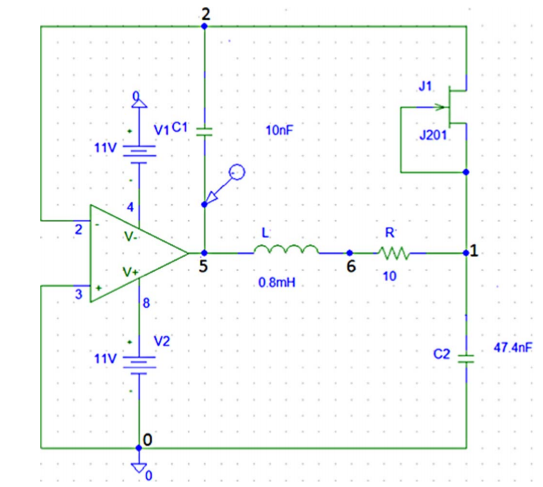

El elemento clave para agregar la no linealidad es el JFET. El JFET se escuentra operando en modo triodo, en el cual produce una relación no lineal entre el voltaje y la corriente. Esta forma no lineal es una función a trozos cómo se mostrará más adelante. 

## Ecuaciones que modelan al circuito

Resolviendo el circuito usando las leyes de kirchhoff se tienen las expresiones 

$$
\begin{aligned}
C_1\dot{V}_{C_1} &= I\\
C_2\dot{V}_{C_2} &= I - I_L\\
L\dot{I}_L  &= -(V_{C_1} - V_{C_2} + RI_L)
\end{aligned}
$$

La no linealida, como se mencionó enteriormente, es agregada por el JFET, que tiene la siguiente relación corriente voltaje

$$I = \frac{1}{R_J}\left\lbrace\begin{array}{c} -V_{C_2}~si~-V_{C_2} \geq 1  \\ V_T~si~-V_{C_k} < V_T \end{array}\right.$$


Considerando los siguiente valores para el JFET $R_J 	\approx 750 \Omega$  y $V_T \approx -0.66 V$ para el gate-source del JFET. Y realizando los siguiente cambios de variable $\alpha = \frac{C_1}{C_2}$, $\beta = \frac{R^2_JC_1}{L}$ y $\gamma = \frac{R}{R_J}$, también$ I = \frac{V_T\phi(y)}{R_J}$, $V_{C_1} = xV_T$, $V_{C_2} = yV_T$, $I_L = \frac{zV_T}{R_J}$ y $t = R_JC_1\tau$

Podemos llegar a la siguiente forma

$$ \begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \end{bmatrix} = \begin{bmatrix}
0       &  0         &   0    \\
0       &   0         &   -\alpha       \\
-\beta  &  \beta   &  -\beta\gamma   \\   
            \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix} +
\begin{bmatrix} 1 \\ \alpha \\ 0
             \end{bmatrix} \phi(y)$$
$$$$
Donde 

$$\phi(y)=\left\lbrace\begin{array}{c} -y~si~y \leq 1  \\ -1~si~y > 1 \end{array}\right. $$

O de forma más sencilla 

$$\phi(x) = -min(y,1)$$

El anterior sistema puede ser escrito de la forma *Jerk*, realizando sustituciones se llega  a la siguiente forma: 
$$\dddot{y} = -\alpha\left[\frac{\beta\gamma}{\alpha}\ddot{y}-\beta \phi(x) + \beta\dot{y}-\beta\gamma\dot{\phi(y)}-\ddot{\phi(y)}\right]$$

Por lo que se puede ver que el circuito está governado por una ecuación de la forma *Jerk*

## Puntos de equilibrio y su estabilidad

Los puntos de equilibrio son soluciones a la ecuación 
$$\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$$

Que en nuestro caso sería equivalente a 

$$\phi(y) = 0$$
$$z = \phi(y)$$
$$x = y - \gamma z$$

La única manera para que esto se cumpla es cuando $y=0$. Entonces el único punto de equilibiro es $P_0 = (0,0,0)$



### Estabilidad 
Obteniendo el jacobiano del sistema  alrededor del punto de equilibrio $P_0$ se tiene $\phi(y)$ es de la forma $\phi(x) = -y$

enotonces 

$$\boldsymbol{J} = \begin{bmatrix} 0 & -1 & 0 \\
0 & -\alpha & -\alpha \\
-\beta & \beta & -\beta\gamma\end{bmatrix}$$

observando los valores propios del Jacobiano 

$$det(\lambda \boldsymbol{I} - \boldsymbol{J})= 0$$

$$ \lambda^3 + (\beta \gamma + \alpha )\lambda^2 + (\alpha \beta + \alpha \beta \gamma)\lambda + \alpha\beta = 0$$



usando el criterio de estabilidad de [Routh-Hurwitz](https://es.wikipedia.org/wiki/Teorema_de_Routh-Hurwitz)

$$ \begin{array}{c:ccc}
\lambda^3  & 1 & \alpha\beta(1+\gamma) & 0\\
\lambda^2  & \alpha + \beta\gamma & \alpha\beta & 0\\
\lambda^1  & \frac{\alpha \beta(1+\gamma)(\alpha+\beta\gamma)- \alpha\beta}{\alpha +\beta\gamma} & 0 & 0 \\
\lambda^0  & \alpha\beta & 0 & 0
\end{array}$$

Teniendo en cuenta que $\alpha, \beta$  y $\gamma$ siempre son positivos la única manera de que el punto de equilibrio sea inestable es cuando $(1+\gamma)(\alpha + \beta\gamma) < 1$.


En el artículo de referencia proponen poner como constante los parámetros $\alpha = 0.0265$ y $\beta = 0.765$ y como parámetro de bifurcación a $\gamma$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

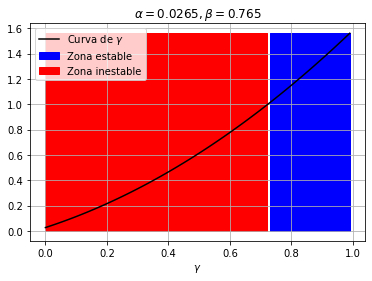

In [ ]:
alpha = 0.0265 
beta = 0.765
gamma = np.arange(0,1,0.01)
g = (1+gamma)*(alpha + beta*gamma)
plt.plot(gamma,g,color='k')
plt.fill_between(gamma[g>=1],max(g), color = 'b')
plt.fill_between(gamma[g<=1],max(g), color = 'r')
plt.legend(['Curva de $\gamma$','Zona estable', 'Zona inestable'])
plt.xlabel('$\gamma$')
plt.title(r'$\alpha = 0.0265, \beta = 0.765$')
plt.grid()

# Simulación 

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def jerk_eq(t,xyz,alpha,beta,gamma):
    x,y,z = xyz
    return [-min(y,1),-alpha*z+ alpha*(-min(y,1)),-beta*x+beta*y-beta*gamma*z]

def plot(solucion,init_condi,title):
  t = solucion.t
  x = solucion.y[0,:]
  y = solucion.y[1,:]
  z = solucion.y[2,:]

  fig = plt.figure(figsize=(20,10))
  fig.suptitle(title)
  ax = fig.add_subplot(2, 2, 1, projection='3d')
  ax.scatter(init_condi[0],init_condi[1],init_condi[2],c='r')
  ax.plot3D(x,y,z)
  #ax.view_init(60, 45)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  ax = fig.add_subplot(2, 2, 2)
  ax.plot(t,x)
  ax.set_ylabel('x')
  ax.set_xlabel('t')

  ax = fig.add_subplot(2, 2, 3)
  ax.plot(t,y)
  ax.set_ylabel('y')
  ax.set_xlabel('t')

  ax = fig.add_subplot(2, 2, 4)
  ax.plot(t,z)
  ax.set_ylabel('z')
  ax.set_xlabel('t')
  plt.show()

In [ ]:
gammas = [0.2, 0.5,0.8,1]
#gammas = [0.1705, 0.14,0.124,0.085] #paper

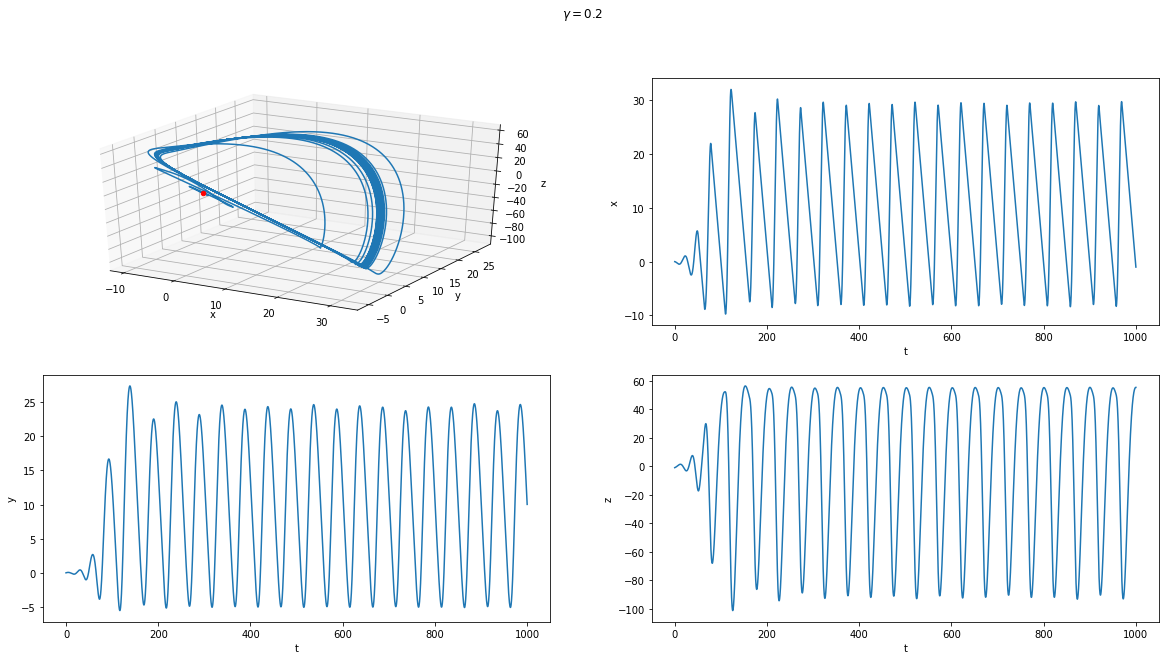

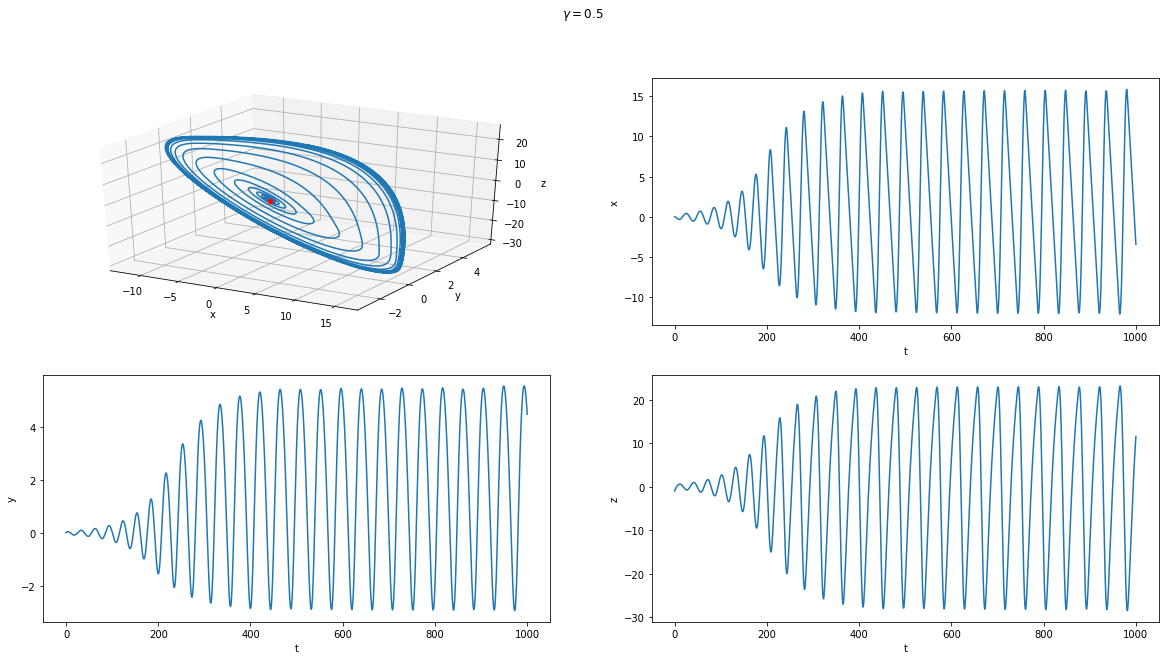

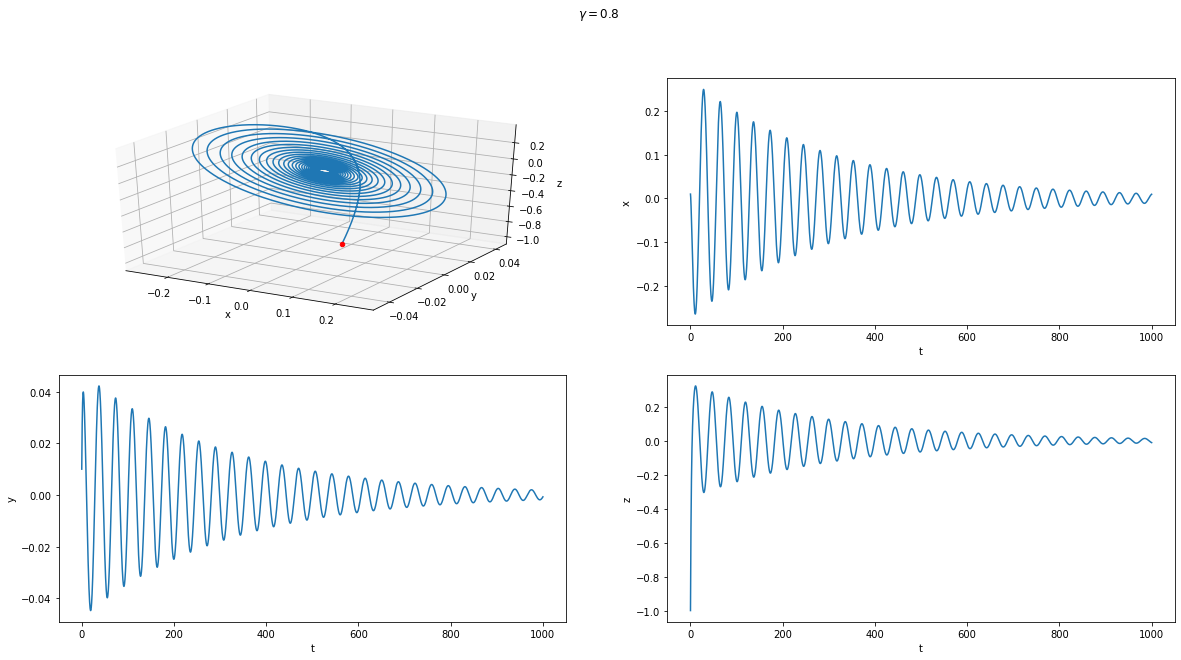

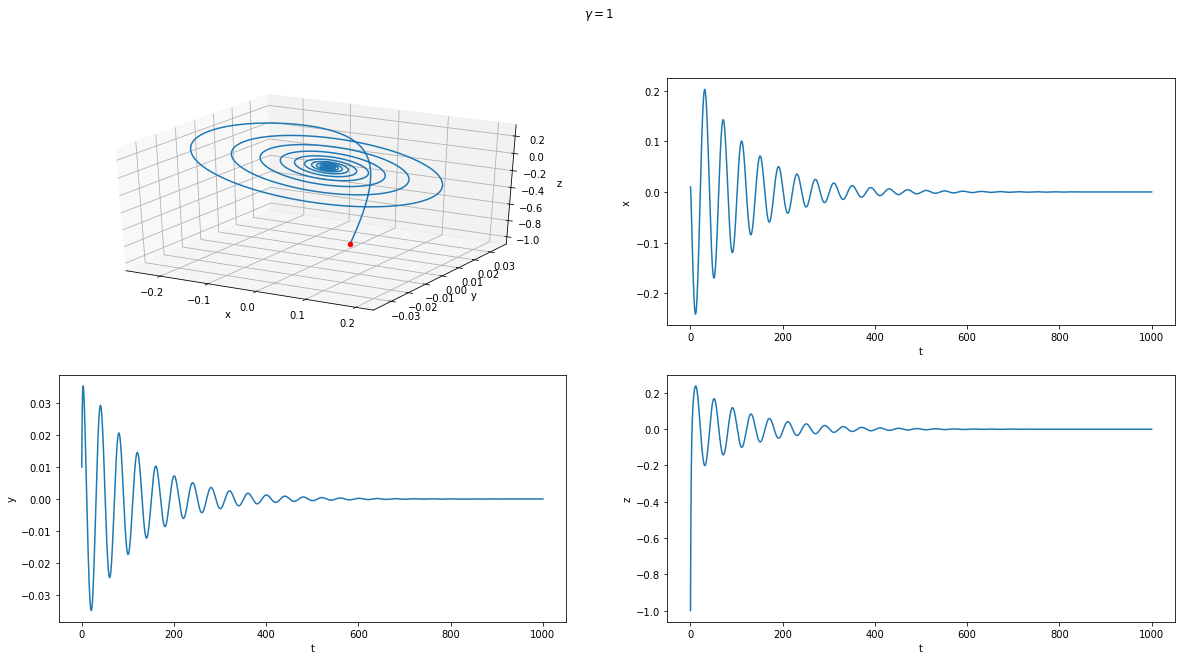

In [ ]:
time = [0,1000]
t = np.arange(time[0],time[1],0.001)
init_condi = [0.01,0.01,-1]
for gamma in gammas:
  solucion = solve_ivp(jerk_eq,time,init_condi,args=[0.025,0.765,gamma],t_eval=t)
  plot(solucion,init_condi,title="$\gamma = $" + str(gamma))

# Simulación interactiva 

In [ ]:
from ipywidgets import interact, interactive,AppLayout
from IPython.display import clear_output, display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import axes3d

In [ ]:
def plot_interactive(x_p=0,y_p=-2.50,z_p=0.8,
                   N=10,angle2=-174, angle=238., max_time=257.0,gamma=0.20):

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')
    
    def jerk_eq(t,xyz,alpha,beta,gamma):
      x,y,z = xyz
      return [-min(y,1),-alpha*z+ alpha*(-min(y,1)),-beta*x+beta*y-beta*gamma*z]
    np.random.seed(1)
    x0 = np.random.random((N, 3))
    x0[:,0]= x0[:,0]+x_p
    x0[:,1]= x0[:,1]+y_p
    x0[:,2]= x0[:,2]+z_p
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))

    time = (0,max_time)
    x_t = np.asarray([solve_ivp(jerk_eq,time,ini_condi,args =[alpha,beta,gamma], t_eval = t).y for ini_condi in x0])

    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x = x_t[i,0,:]
        y = x_t[i,1,:]
        z = x_t[i,2,:]
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(angle2, angle)
    plt.show()
    return t, x_t

In [ ]:
w = interactive(plot_interactive,angle2=(0.,180.),angle=(0.,180.),
                max_time=(0.1,2000.), N=(1,50),gamma=(0.00,1.00),x_p=(-50.,40.),y_p=(-40.,40.),z_p=(-40.,100.))
display(w)


interactive(children=(FloatSlider(value=0.0, description='x_p', max=40.0, min=-50.0), FloatSlider(value=-2.5, …

## Diagrama de Bifurcaciones 

In [ ]:
def event_jerk(t,xyz,alpha,beta,gamma):
    x,y,z = xyz
    return y+x
event_jerk.direction = -1

In [ ]:
time = [0,1000]
t = np.arange(time[0],time[1],0.001)
init_condi = [0.1,-5e-7,-1]

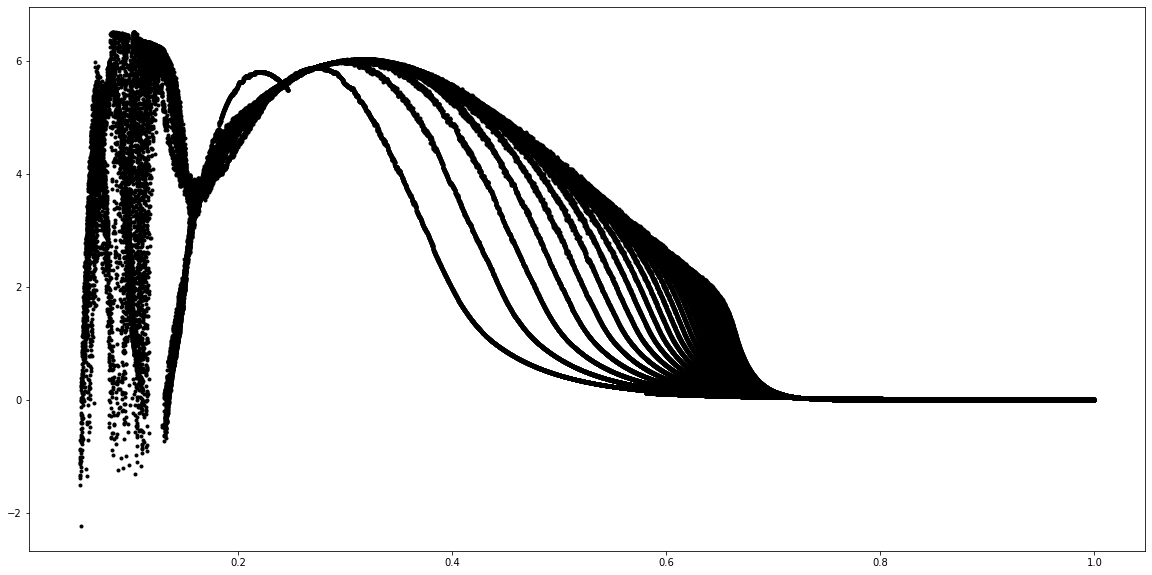

In [ ]:
rs = np.arange(0,1,0.0001)
plt.figure(figsize=(20,10))
for r in rs:
    solucion = solve_ivp(jerk_eq,time,init_condi,events=[event_jerk],args=[0.025,0.765,r],t_eval=t)
    for i,t_ in enumerate(solucion.t_events[0]):
        if t_ > 100:
            plt.plot(r,solucion.y_events[0][i,1],'.k')

# Análisis de Resultados 

Como se vió en el apartado de ecuaciones el sistema cuenta solo con un punto de equilibrio, el cual cambia de estable a inestable alrededor de $\gamma = 0.75$. Cuando el punto es estable hace que cualquier punto $P_{x,y,z}$ converjan al punto de equilibrio, actuando así como un atractor. Cuando el punto de equilibrio es inestable este tiende a repeler cualquier punto $P_{x,y,z}$. También se vió, más especificamente en el diagrama de bifurcaciones, que mientras el punto de equilibrio es inestable para valores pequeños de $\gamma$ se presentan caos y para los otros se presenta un ciclo límite. 

# Conclusiones 

Se presento una simulación de un sistema de ecuaciones diferenciales de la forma *jerk*, mostrando las gráficas de fase y diagrama de bifurcaciones con respecto a un parámetro de bifurcación. Se vió como para ciertos rangos del parámetro de bifurcación el sistema se comporta de forma caótica, se comporta como un oscilador(existencia de un ciclo límite estable) o no tiende a oscilar(el punto de equilibrio se comporta cómo un atractor). 

# Referencias 
* [Chaos in a Single Op-Amp–Based Jerk Circuit: Experiments and Simulations](https://repositorio.unesp.br/bitstream/handle/11449/172852/2-s2.0-84963976895.pdf?sequence=1&isAllowed=y) 

* [Criterio de estabilidad de Routh-Hurwitz](https://es.wikipedia.org/wiki/Teorema_de_Routh-Hurwitz)